#The Puzzle
###Description
Given an empty rectangular frame of length L and width W and N rectangular tiles, write a GA that arranges the tiles in the Frame in such a way that it minimizes the free space.

### Inputs
An individual is json, with the following tags-length, width (dimensions of the frame), pieces - number of tiles and puzzle- a list of all the tiles.

Each tile is a list [x, y, l, w], where x,y is the bottom left coordinates of the tile and l,w is the dimension of the tile.

Population is a json with the desired number(population_size) of individuals.

Running the function generate, generates the json file - population.json. The function also generates the solution as a json file (solution.json) when the parameter sol is set to true.


### Uploading the support Codes

After **uploading** the **Part-A-Support.zip** file, run the below code to extract all the files.

In [ ]:
!unzip Part-A-Support.zip

Archive:  Part-A-Support.zip
replace fitnessEval.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: fitnessEval.py          
  inflating: generator.py            
  inflating: puzzleDraw.py           
  inflating: puzzleGenerator.py      
  inflating: rotate.py               
  inflating: shuffle2DPieces.py      
  inflating: split2Dpiece.py         


### Generating Puzzle and Initial Population

After running all the codes above once, Use the function **generator(population_size, sol)** to generate a new puzzle and its associated initial population.

You can change the population size as needed, and if you want to know about the solution, set sol=True. 

Two JSON files would be generated, **population.json** and **solution.json** for the population and solution respectively.

Download these JSON files and use it as need.

In [ ]:
import generator as gen
import json
#reading population
gen.generate(population_size=100, sol=True)

# Visualizing the results.

Write your solution (which you want to visualize) as a json file (check the solution.json) and upload the file and use the code below to visualize the plots.

Incase if you are updating the population.json file, then upload the file and use the fittest individual json for visualization. Refer the codes below.

**Note:** Make sure that if it is a new file, upload the file and change the filename in the code

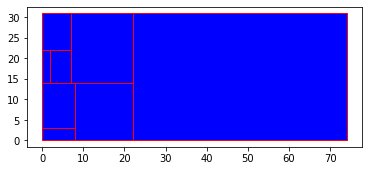

In [ ]:
import puzzleDraw as pd
with open("solution.json",'r') as f:
  solution = json.loads(f.read());
pd.draw2(json.dumps(solution))

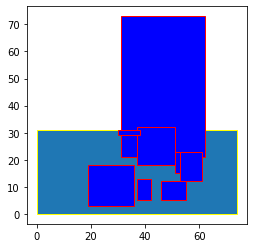

In [ ]:
with open("population.json",'r') as f:
  population = json.loads(f.read());

pd.draw2(json.dumps(population["95"]))

# Fitness Evaluation

Fitness of an individual is a reflection of how well the tiles fit in the frame, which could be measured by finding the percentage of freespace in the frame.

A sample of the fitness evaluation(written in python) is shared, please refer to the function in fitnessEval.py.

In [ ]:
import fitnessEval as fit
fit.fitnessEval(json.dumps(solution))

'{"fitness": 0.0}'

In [ ]:
fit.fitnessEval(json.dumps(population["99"]))

'{"fitness": 33.12990409764603}'

### Additional Support

Sample JSON read/write codes in JAVA/C++ are provided as port of the Assignment.

For additional Support please reach out to Alen/Koa.

### SOLUTION


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from rotate import rotate
from shuffle2DPieces import scatter
import puzzleGenerator as puzzle_gen

In [ ]:
def representation(population):
  genotypes = []
  for i in range(len(population)):
    genotypes.append(np.array(population[str(i)]['puzzle']))
  return genotypes

In [ ]:
def parent_selection(population, num_parents):
  fitness = []
  for i in range(len(population)):
    fitness.append(100-fitness_function(population[str(i)]))
  fitness = np.array(fitness)
  probs = fitness/np.sum(fitness)
  parents_indices = np.random.choice(np.arange(len(population)), num_parents, replace=False, p=probs)
  parents = {str(index): population[str(parents_indices[index])] for index in range(len(parents_indices))}
  return parents

In [ ]:
def crossover(parents):
  genotypes = representation(parents)
  num_offsprings = int((len(parents)/2))
  offsprings = {}
  for i in range(num_offsprings): 
    parent1 = genotypes[i]
    parent2 = genotypes[i+num_offsprings]
    offspring = parents[str(i)].copy()
    tiles = []
    for j in range(len(parents[str(i)]['puzzle'])):
      x1, y1, l1, w1 = parent1[j,:]
      x2, y2, l2, w2 = parent2[j,:]
      if l1 == l2:
        l_offspring = l1
        w_offspring = w1
        x_offspring = round((x1 + x2)/2)
        y_offspring = round((y1 + y2)/2)
      else:
        if np.random.uniform(0,1) > 0.5:
          l_offspring, w_offspring = l1, w1
          x_offspring, y_offspring = x1, y1
        else:
          l_offspring, w_offspring = l2, w2
          x_offspring, y_offspring = x2, y2

      tiles.append([x_offspring, y_offspring, l_offspring, w_offspring])
    offspring['puzzle'] = tiles
    offsprings[str(i)] = offspring
  return offsprings

In [ ]:
def mutation(offsprings):
  mutated_offsprings = {}
  for i in range(len(offsprings)):
    L = offsprings[str(i)]['length']
    W = offsprings[str(i)]['width']
    pieces = offsprings[str(i)]['puzzle']
    if np.random.uniform(0,1) > 0.5:
      puzzle = rotate(pieces)
      offsprings[str(i)]['puzzle'] = puzzle
    if np.random.uniform(0,1) > 0.5:
      puzzle = scatter(pieces,L,W)
      offsprings[str(i)]['puzzle'] = puzzle
    mutated_offsprings[str(i)] = offsprings[str(i)]
  return mutated_offsprings

In [ ]:
def survivor_selection(population, mutated_offsprings):
  fitness = []
  for i in range(len(population)):
    fitness.append(100-fitness_function(population[str(i)]))
  fitness = np.array(fitness)
  indices = np.argsort(fitness)[0:len(mutated_offsprings)]
  for index in range(len(indices)):
    population[str(indices[index])] = mutated_offsprings[str(index)]
  return population

In [ ]:
def fittest(population):
  fitness = []
  for i in range(len(population)):
    fitness.append(100-fitness_function(population[str(i)]))
  fitness = np.array(fitness)
  return max(fitness), population[str(np.argmax(fitness))]

In [ ]:
def draw(obj):
  pieces = obj['puzzle']
  plt.axes()
  rectangle = plt.Rectangle((0, 0), obj['length'], obj['width'], ec="yellow")
  print(obj['length'], obj['width'])
  plt.gca().add_patch(rectangle)
  for i in pieces:
    x1 = i[0]
    y1 = i[1]
    x2 = i[2]
    y2 = i[3]
    rectangle = plt.Rectangle((x1, y1), x2, y2, fc='blue', ec="red")
    plt.gca().add_patch(rectangle)
  plt.axis('scaled')
  plt.show()

In [ ]:
def fitness_function(obj):
    pieces = obj['puzzle']
    l = obj['length']
    w = obj['width']
    if len(pieces) == 0 or l == None or l == 0 or w == None or w == 0:
        return json.dumps({'fitness': 'input error'})
    frame = [[1 for _ in range(l)] for _ in range(w)]
    count = 0
    for p in pieces:
        count += 1
        for j in range(p[1], p[1] + int(p[3])):
            for i in range(p[0], p[0] + int(p[2])):
                if i < l and j < w:
                    frame[j][i] = 0
    free_space = 0
    frame = frame[::-1]
    for i in frame:
        for k in i:
            free_space += k
    return free_space/(l*w) * 100

In [ ]:
#reading population
gen.generate(population_size=200, sol=True)
with open("population.json",'r') as f:
  population = json.loads(f.read());

num_generations = 200
num_parents = 100
fitness_values = []
for generation in range(num_generations):
  #print(generation)
  parents = parent_selection(population, num_parents)
  offsprings = crossover(parents)
  mutated_offsprings = mutation(offsprings)
  population = survivor_selection(population, mutated_offsprings)
  fitness_val, fittest_individual = fittest(population)
  fitness_values.append(fitness_val)

In [ ]:
fittest_individual

{'length': 116,
 'pieces': 36,
 'puzzle': [[13, 39, 4, 20],
  [84, 38, 20, 2],
  [36, 28, 20, 4],
  [68, 21, 49, 3],
  [24, 22, 6, 4],
  [31, 40, 5, 6],
  [40, 24, 10, 37],
  [19, 48, 12, 2],
  [76, 25, 2, 20],
  [98, 6, 20, 4],
  [52, 34, 3, 7],
  [48, 39, 4, 7],
  [80, 35, 3, 15],
  [50, 15, 3, 15],
  [55, 6, 2, 12],
  [76, 38, 6, 3],
  [78, 26, 3, 6],
  [86, 32, 3, 9],
  [38, 4, 6, 2],
  [16, 30, 6, 4],
  [64, 2, 4, 9],
  [83, 30, 9, 13],
  [94, 15, 2, 7],
  [42, 13, 5, 7],
  [64, 21, 28, 5],
  [59, 20, 7, 28],
  [69, 22, 7, 17],
  [77, 40, 2, 17],
  [94, 18, 17, 5],
  [64, 30, 83, 3],
  [36, 25, 83, 3],
  [16, 1, 83, 19],
  [97, 27, 83, 2],
  [24, 36, 83, 10],
  [52, 36, 9, 12],
  [8, 2, 12, 46]],
 'width': 49}

In [ ]:
fitness_val

70.8128078817734

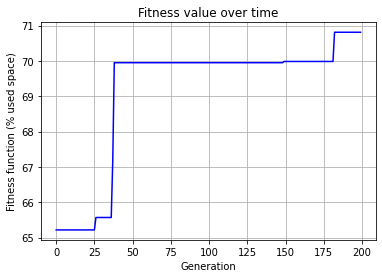

In [ ]:
plt.plot(fitness_values, 'b-')
plt.grid(True)
plt.xlabel('Generation')
plt.ylabel('Fitness function (% used space)')
plt.title('Fitness value over time')
plt.show()

116 49


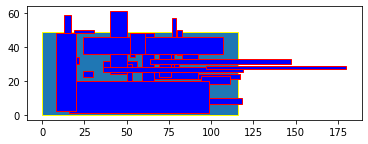

In [ ]:
draw(fittest_individual)

In [ ]:
population['0']

{'length': 116,
 'pieces': 36,
 'puzzle': [[14, 16, 4, 20],
  [25, 37, 20, 2],
  [86, 26, 20, 4],
  [38, 31, 49, 3],
  [116, 33, 6, 4],
  [111, 36, 6, 5],
  [46, 36, 10, 37],
  [67, 2, 2, 12],
  [51, 15, 20, 2],
  [114, 16, 4, 20],
  [12, 35, 3, 7],
  [43, 28, 7, 4],
  [102, 4, 3, 15],
  [30, 2, 3, 15],
  [97, 29, 2, 12],
  [43, 49, 6, 3],
  [38, 25, 3, 6],
  [69, 16, 3, 9],
  [111, 18, 6, 2],
  [50, 22, 6, 4],
  [78, 18, 9, 4],
  [47, 47, 9, 13],
  [92, 39, 2, 7],
  [9, 4, 7, 5],
  [47, 43, 5, 28],
  [61, 36, 28, 7],
  [64, 21, 17, 7],
  [66, 11, 17, 2],
  [25, 12, 17, 5],
  [8, 25, 3, 83],
  [22, 35, 83, 3],
  [106, 48, 83, 19],
  [115, 35, 83, 2],
  [112, 1, 10, 83],
  [88, 42, 9, 12],
  [5, 45, 12, 46]],
 'width': 49}

In [ ]:
population['1']

{'length': 116,
 'pieces': 36,
 'puzzle': [[45, 10, 20, 4],
  [40, 26, 2, 20],
  [0, 45, 20, 4],
  [82, 26, 49, 3],
  [75, 24, 6, 4],
  [87, 26, 5, 6],
  [16, 37, 37, 10],
  [33, 16, 2, 12],
  [42, 8, 20, 2],
  [18, 14, 4, 20],
  [40, 30, 7, 3],
  [28, 16, 4, 7],
  [22, 20, 15, 3],
  [100, 40, 3, 15],
  [40, 24, 2, 12],
  [54, 5, 6, 3],
  [53, 19, 3, 6],
  [45, 23, 9, 3],
  [57, 26, 6, 2],
  [33, 15, 6, 4],
  [80, 26, 4, 9],
  [30, 27, 9, 13],
  [26, 38, 7, 2],
  [15, 39, 5, 7],
  [52, 12, 5, 28],
  [94, 0, 28, 7],
  [24, 28, 17, 7],
  [53, 38, 17, 2],
  [39, 8, 17, 5],
  [74, 4, 83, 3],
  [50, 14, 3, 83],
  [75, 35, 19, 83],
  [69, 20, 83, 2],
  [43, 34, 83, 10],
  [50, 47, 12, 9],
  [23, 41, 46, 12]],
 'width': 49}

In [ ]:
population['99']

{'length': 116,
 'pieces': 36,
 'puzzle': [[60, 0, 20, 4],
  [76, 33, 20, 2],
  [110, 22, 4, 20],
  [88, 20, 49, 3],
  [36, 30, 4, 6],
  [55, 22, 5, 6],
  [17, 40, 37, 10],
  [66, 8, 2, 12],
  [78, 20, 2, 20],
  [34, 37, 20, 4],
  [61, 14, 7, 3],
  [82, 16, 4, 7],
  [46, 33, 15, 3],
  [24, 24, 3, 15],
  [70, 36, 12, 2],
  [76, 13, 3, 6],
  [89, 23, 3, 6],
  [85, 15, 3, 9],
  [52, 14, 2, 6],
  [62, 31, 6, 4],
  [62, 24, 4, 9],
  [44, 20, 9, 13],
  [58, 17, 2, 7],
  [26, 23, 7, 5],
  [62, 24, 5, 28],
  [26, 24, 7, 28],
  [54, 30, 7, 17],
  [56, 19, 2, 17],
  [34, 21, 17, 5],
  [54, 42, 3, 83],
  [67, 25, 83, 3],
  [33, 11, 83, 19],
  [64, 20, 2, 83],
  [30, 2, 83, 10],
  [51, 36, 9, 12],
  [75, 38, 46, 12]],
 'width': 49}